In [1]:
import pandas as pd
import numpy as np

In [2]:
#from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing the dataset
url = "reviews_data.csv"
df=pd.read_csv(url)

In [4]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [5]:
df.rename(columns={'sentiment':'Sentiments'},inplace=True)

In [6]:
df.isnull().sum()

review        21207
Sentiments    21207
dtype: int64

In [7]:
#delete null rows
df.dropna(subset = ["review"],inplace=True)
df.dropna(subset = ["Sentiments"],inplace=True)

In [8]:
df.isnull().sum()

review        0
Sentiments    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28793 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      28793 non-null  object
 1   Sentiments  28793 non-null  object
dtypes: object(2)
memory usage: 674.8+ KB


In [10]:
df.shape

(28793, 2)

In [11]:
df.describe()

review Sentiments
count                                               28793      28793
unique                                              28653          2
top     Loved today's show!!! It was a variety and not...   negative
freq                                                    4      14522

In [12]:
df['Sentiments'].value_counts()

negative    14522
positive    14271
Name: Sentiments, dtype: int64

# Data Cleaning

In [13]:
#converting all of the words into a consistent case format,say lowercase
df['review']=df['review'].str.lower()

In [14]:
df.review.head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. <br /><br />the...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object

In [15]:
#Remove Punctuation marks
df['review'] = df['review'].str.replace('[^\w\s]',"")

In [16]:
df.review.head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production br br the filmin...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object

In [17]:
# to strip away html markup with the help of BeautifulSoup 
# Remove noisy text

In [18]:
from bs4 import BeautifulSoup
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Remove noisy text
def denoise_text(text):
    text = strip_html(text)
    return text
# apply function on review column
df['review']=df['review'].apply(denoise_text)

In [19]:
# Tokenization 

In [20]:
import nltk
from nltk import word_tokenize
token_lists=[word_tokenize(each)for each in df['review']]
tokens= [item for sublist in token_lists for item in sublist]
print("number of unique tokens :",len(set(tokens)))

number of unique tokens : 132380


In [21]:
token_lists

[['one',
  'of',
  'the',
  'other',
  'reviewers',
  'has',
  'mentioned',
  'that',
  'after',
  'watching',
  'just',
  '1',
  'oz',
  'episode',
  'youll',
  'be',
  'hooked',
  'they',
  'are',
  'right',
  'as',
  'this',
  'is',
  'exactly',
  'what',
  'happened',
  'with',
  'mebr',
  'br',
  'the',
  'first',
  'thing',
  'that',
  'struck',
  'me',
  'about',
  'oz',
  'was',
  'its',
  'brutality',
  'and',
  'unflinching',
  'scenes',
  'of',
  'violence',
  'which',
  'set',
  'in',
  'right',
  'from',
  'the',
  'word',
  'go',
  'trust',
  'me',
  'this',
  'is',
  'not',
  'a',
  'show',
  'for',
  'the',
  'faint',
  'hearted',
  'or',
  'timid',
  'this',
  'show',
  'pulls',
  'no',
  'punches',
  'with',
  'regards',
  'to',
  'drugs',
  'sex',
  'or',
  'violence',
  'its',
  'is',
  'hardcore',
  'in',
  'the',
  'classic',
  'use',
  'of',
  'the',
  'wordbr',
  'br',
  'it',
  'is',
  'called',
  'oz',
  'as',
  'that',
  'is',
  'the',
  'nickname',
  'given'

In [22]:
#Remove Stopwords
from nltk.corpus import stopwords
set(stopwords.words('english'))
#set of stopwords
stop_words = set(stopwords.words('english'))
def cleaning_stopwords(review):
    return " ".join([word for word in str(review).split() if word not in stop_words])
df["review"] = df["review"].apply(lambda review: cleaning_stopwords(review))

In [23]:
df.review.head(20)

0     one reviewers mentioned watching 1 oz episode ...
1     wonderful little production br br filming tech...
2     thought wonderful way spend time hot summer we...
3     basically theres family little boy jake thinks...
4     petter matteis love time money visually stunni...
5     probably alltime favorite movie story selfless...
6     sure would like see resurrection dated seahunt...
7     show amazing fresh innovative idea 70s first a...
8     encouraged positive comments film looking forw...
9     like original gut wrenching laughter like movi...
10    phil alien one quirky films humour based aroun...
11    saw movie 12 came recall scariest scene big bi...
12    im big fan bolls work many enjoyed movie posta...
13    cast played shakespearebr br shakespeare lostb...
14    fantastic movie three prisoners become famous ...
15    kind drawn erotic scenes realize one amateuris...
16    films simply remade one bad film fails capture...
17    movie made one top 10 awful movies horribl

In [24]:
#Spelling Corrections

In [25]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [26]:
#from textblob import TextBlob
#df["review"] = df["review"].apply(lambda x: str(TextBlob(x).correct()))

In [27]:
#Lemmatization

In [28]:
from textblob import Word
df["review"] = df["review"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [29]:
df.review.head(20)

0     one reviewer mentioned watching 1 oz episode y...
1     wonderful little production br br filming tech...
2     thought wonderful way spend time hot summer we...
3     basically there family little boy jake think t...
4     petter matteis love time money visually stunni...
5     probably alltime favorite movie story selfless...
6     sure would like see resurrection dated seahunt...
7     show amazing fresh innovative idea 70 first ai...
8     encouraged positive comment film looking forwa...
9     like original gut wrenching laughter like movi...
10    phil alien one quirky film humour based around...
11    saw movie 12 came recall scariest scene big bi...
12    im big fan boll work many enjoyed movie postal...
13    cast played shakespearebr br shakespeare lostb...
14    fantastic movie three prisoner become famous o...
15    kind drawn erotic scene realize one amateurish...
16    film simply remade one bad film fails capture ...
17    movie made one top 10 awful movie horrible

<AxesSubplot:>

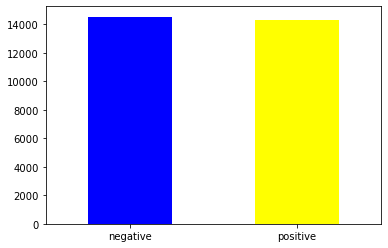

In [30]:
# distribution of sentiment
result = df['Sentiments'].value_counts()
result.plot(kind='bar',rot=0,color=['blue','yellow'])

In [31]:
df['Sentiments'] = df['Sentiments'].replace({"positive":1,"negative":0})

In [32]:
df.head()

review  Sentiments
0  one reviewer mentioned watching 1 oz episode y...           1
1  wonderful little production br br filming tech...           1
2  thought wonderful way spend time hot summer we...           1
3  basically there family little boy jake think t...           0
4  petter matteis love time money visually stunni...           1

In [33]:
df.shape

(28793, 2)

In [34]:
# split the data into dependent and independent feature

In [46]:
x = df['review']
y = df['Sentiments']

In [47]:
x.head()

0    one reviewer mentioned watching 1 oz episode y...
1    wonderful little production br br filming tech...
2    thought wonderful way spend time hot summer we...
3    basically there family little boy jake think t...
4    petter matteis love time money visually stunni...
Name: review, dtype: object

In [48]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: Sentiments, dtype: int64

In [49]:
#corpus = []

In [51]:
#for i in range(len(x)):
    #corpus.append(df.review)

In [52]:
#corpus

In [53]:
# Convert text data into vectors using TfidfVectorizer

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
x = vectorizer.fit_transform(df.review).toarray()

In [55]:
x.shape

(28793, 5000)

## Train-Test Splitting

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Rows in train set:{len(X_train)}\n Rows in test set:{len(X_test)}\n")

Rows in train set:23034
 Rows in test set:5759



In [57]:
X_train.shape

(23034, 5000)

In [58]:
Y_train.shape

(23034,)

In [59]:
X_test.shape

(5759, 5000)

In [60]:
Y_test.shape

(5759,)

In [61]:
# check for equal distriution of 0,1 in test and train set

In [62]:
Y_train.head()

2412     0
45363    0
42275    1
30910    0
3274     1
Name: Sentiments, dtype: int64

In [63]:
Y_test.head()

17265    0
3316     0
11767    1
11356    1
49820    0
Name: Sentiments, dtype: int64

In [64]:
Y_train.value_counts()

0    11594
1    11440
Name: Sentiments, dtype: int64

In [65]:
Y_test.value_counts()

0    2928
1    2831
Name: Sentiments, dtype: int64

# Selecting a desired model

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(tol = 0.1, solver = "lbfgs")

In [67]:
#training model with train dataset
model.fit(X_train,Y_train)

LogisticRegression(tol=0.1)

In [68]:
df_prediction = model.predict(X_train)

In [69]:
#Accuracy scores
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(Y_train,df_prediction)
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.9163410610402014


In [70]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_train,df_prediction))

[[10543  1051]
 [  876 10564]]


In [71]:
from sklearn.metrics import precision_score , recall_score

In [72]:
#This is my precision score
precision_score(Y_train , df_prediction)

0.9095135600516573

In [73]:
#This is my recall score
recall_score(Y_train , df_prediction)

0.9234265734265734

In [74]:
#F1 Score--------it is harmonic mean of Precision and Recall
from sklearn.metrics import f1_score
f1_score(Y_train , df_prediction)

0.9164172630665799

In [75]:
# check Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_train, df_prediction))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     11594
           1       0.91      0.92      0.92     11440

    accuracy                           0.92     23034
   macro avg       0.92      0.92      0.92     23034
weighted avg       0.92      0.92      0.92     23034



### Test Model with Test Data

In [76]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(tol = 0.1, solver = "lbfgs")
model1.fit(X_test,Y_test)

LogisticRegression(tol=0.1)

In [77]:
# Testing the model on test data

In [78]:
X_test_prediction = model1.predict(X_test)

In [79]:
#Accuracy
from sklearn.metrics import accuracy_score
testing_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print('Accuracy on training data:',testing_data_accuracy)

Accuracy on training data: 0.9347108873068241


In [80]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,X_test_prediction))

[[2718  210]
 [ 166 2665]]


In [81]:
from sklearn.metrics import precision_score , recall_score
precision_score(Y_test , X_test_prediction)

0.9269565217391305

In [82]:
recall_score(Y_test , X_test_prediction)

0.941363475803603

In [83]:
#F1 Score--------it is harmonic mean of Precision and Recall
from sklearn.metrics import f1_score
f1_score(Y_test , X_test_prediction)

0.9341044514546092

In [84]:
# check Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2928
           1       0.93      0.94      0.93      2831

    accuracy                           0.93      5759
   macro avg       0.93      0.93      0.93      5759
weighted avg       0.93      0.93      0.93      5759



In [85]:
# Difference between actual and predicted values
pd.DataFrame(np.c_[Y_test,X_test_prediction],columns=["Actual" , "predicted"])

Actual  predicted
0          0          0
1          0          0
2          1          1
3          1          1
4          0          0
...      ...        ...
5754       0          0
5755       0          0
5756       0          1
5757       1          1
5758       0          0

[5759 rows x 2 columns]

In [86]:
#Saving the model

In [88]:
import pickle
pickle.dump(vectorizer, open("TfidfVectorizer.pkl", "wb"))
pickle.dump(model1, open("Analyze_Movie_Reviews_Sentiment.pkl", "wb"))

In [89]:
save_vectorizer = pickle.load(open("TfidfVectorizer.pkl", 'rb'))
model1 = pickle.load(open("Analyze_Movie_Reviews_Sentiment.pkl", 'rb'))

In [90]:
#Define a function to test model

In [91]:
def test_model(sentence):
    sen = save_vectorizer.transform([sentence]).toarray()
    result = model1.predict(sen)[0]
    if result == 1:
        return 'Positive Review'
    else:
        return 'Negative Review'

In [94]:
# test positive review and chcek prediction of our model
sen = 'love this movie'
result = test_model(sen)
print(result)

Positive Review


In [95]:
# test negative review and check prediction of our model
sen = 'worst movie'
result = test_model(sen)
print(result)

Negative Review
